# Preprocess sound file by running the function preprocess sound-file 

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
#for loading and visualizing audio files
import librosa 
import librosa.display
import numpy as np
from bird import utils
import audio_spectrogram as rp
from audiofile_read import audiofile_read


### we try schindler method only on 2 files

In [ ]:
from tf.models import Sequential, Model
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Activation, Flatten, merge
from keras.layers.normalization import BatchNormalization

In [50]:
Sound_fpath = "./Lesser-wav/haha/"   ##Sound-files Path 
audio_clips = os.listdir(Sound_fpath)
print("No. of .MP3 files in audio folder = ",len(audio_clips))

No. of .MP3 files in audio folder =  2


In [58]:
for i in range(0,len(audio_clips)):
    filepath = Sound_fpath+audio_clips[i]
    samplerate, samplewidth, wavedata = audiofile_read(filepath,verbose=False)
    sample_length = wavedata.shape[0]

In [59]:
list_spectrograms = [] # spectrograms are put into a list first

# desired output parameters
n_mel_bands = 40   # y axis
frames = 80        # x axis

# some FFT parameters
fft_window_size=512
fft_overlap = 0.5
hop_size = int(fft_window_size*(1-fft_overlap))
segment_size = fft_window_size + (frames-1) * hop_size # segment size for desired # frames

In [60]:
# make Mono (in case of multiple channels / stereo)
if wavedata.ndim > 1:
    wavedata = np.mean(wavedata, 1)        

In [61]:
# take only a segment; choose start position:
#pos = 0 # beginning
pos = int(wavedata.shape[0]/2 - segment_size/2) # center minus half segment size    
wav_segment = wavedata[pos:pos+segment_size]    

In [63]:
    # 1) FFT spectrogram 
    spectrogram = rp.calc_spectrogram(wav_segment,fft_window_size,fft_overlap)

    # 2) Transform to perceptual Mel scale (uses librosa.filters.mel)
    spectrogram = rp.transform2mel(spectrogram,samplerate,fft_window_size,n_mel_bands)
        
    # 3) Log 10 transform
    spectrogram = np.log10(spectrogram)
    
    list_spectrograms.append(spectrogram)
        
print("\nRead", len(audio_clips), "audio files")


Read 2 audio files


In [20]:
list_spectrograms

[array([[ -5.17640958,  -5.61144176,  -5.03057798, ...,  -5.25835605,
          -5.5138978 ,  -5.92091215],
        [ -5.89022885,  -5.72632834,  -5.13551452, ...,  -5.88671063,
          -6.00170176,  -5.65823308],
        [ -6.49129307,  -6.44776097,  -5.80811877, ...,  -5.55513125,
          -6.11666687,  -6.32425178],
        ...,
        [ -7.35885036,  -7.89214948,  -7.71195756, ...,  -7.48048712,
          -7.09142186,  -7.4737435 ],
        [-12.60465493, -12.44741615, -12.47606985, ..., -12.58580055,
         -12.4802779 , -12.64475371],
        [-12.68595302, -12.40867703, -12.44985135, ..., -12.4657911 ,
         -12.62412761, -12.42574389]])]

In [64]:
len(list_spectrograms)

2

In [65]:
print("An audio segment is", round(float(segment_size) / samplerate, 2), "seconds long")

An audio segment is 0.47 seconds long


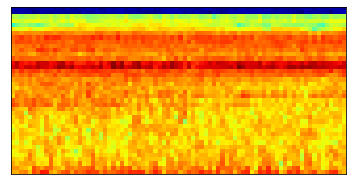

In [66]:
# show spectrogram
fig = plt.imshow(spectrogram, origin='lower')
fig.set_cmap('jet')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

In [67]:
len(audio_clips)

2

In [68]:
####Then continue in colab the deep Learning part 

# Here i load my own soundfile "Mono-type"

In [3]:
Sound_fpath = "./Lesser-wav/haha/"   ##Sound-files Path 
audio_clips = os.listdir(Sound_fpath)
print("No. of .MP3 files in audio folder = ",len(audio_clips))

No. of .MP3 files in audio folder =  1


In [4]:
wave, fs = librosa.load(Sound_fpath+audio_clips[0],duration=2)  # fs = sampling rate//3 sec split
print(type(wave), type(fs))
print(wave.shape, fs)

<class 'numpy.ndarray'> <class 'int'>
(44100,) 22050


In [5]:
filename = Sound_fpath+audio_clips[0] ###rename it 
filename

'./Lesser-wav/haha/Bent-Beak-Riffraff-86.wav'

In [6]:
utils.read_wave_file_not_normalized(filename)

(44100, array([    0,     0,     0, ...,   807,   302, -1345], dtype=int16))

In [26]:
 utils.get_basename_without_ext(filename)

'Bent-Beak-Riffraff-86'

In [8]:
from bird import preprocessing as pr
from bird import signal_processing as sp
 

In [78]:
pr.split_into_segments(wave, fs, 3)

[array([ 0.        ,  0.        ,  0.        , ...,  0.05409143,
         0.01175923, -0.05570596], dtype=float32)]

In [63]:
basename = utils.get_basename_without_ext(filename)

In [17]:
pr.preprocess_wave(wave, fs) ## Here we Preprocess our signal by computing the noise and signal mask of the 
                            ### signal, and extracting each part from the signal

(array([ 0.00026103,  0.00116092,  0.00220594, ...,  0.05198635,
        -0.00318058, -0.0797095 ], dtype=float32),
 array([ 0.        ,  0.        ,  0.        , ..., -0.01502636,
         0.00626583, -0.00244508], dtype=float32))

In [22]:
Sxx = sp.wave_to_amplitude_spectrogram(wave, fs) ##Create the Spectrogram

In [23]:
pr.extract_noise_part(Sxx) ##Extracting the noise

array([[7.3819266e-09, 5.9862355e-06, 5.0656479e-05, ..., 1.7627675e-02,
        1.1161243e-02, 8.3139151e-02],
       [1.7438769e-07, 5.7546017e-06, 4.4283221e-05, ..., 2.4127122e-02,
        4.3116584e-03, 4.7225274e-02],
       [2.0387901e-07, 2.1666481e-06, 4.0469390e-06, ..., 1.7052555e-02,
        4.1865846e-03, 5.3284299e-02],
       ...,
       [8.9228669e-09, 3.3876569e-07, 2.1958051e-06, ..., 3.7038043e-01,
        4.1427749e-01, 2.7723482e-03],
       [2.2873605e-09, 5.1942345e-07, 4.1145081e-06, ..., 4.8930296e-01,
        3.6999798e-01, 1.3759322e-02],
       [9.8536344e-09, 3.6245396e-07, 1.2580099e-06, ..., 8.4295385e-02,
        2.4505660e-01, 8.4555320e-02]], dtype=float32)

In [35]:
pr.extract_signal_part(Sxx) ####Extracting the signal

array([[5.2009063e-04, 1.8643995e-03, 5.6655154e-02, ..., 2.1181570e-02,
        7.1945465e-03, 3.9105676e-02],
       [1.6362726e-03, 4.1323211e-03, 5.1591739e-02, ..., 6.7533222e-03,
        2.0245023e-02, 1.8888623e-02],
       [2.2744325e-03, 1.3115421e-03, 4.5685843e-02, ..., 2.3607878e-02,
        1.6645617e-03, 3.7374916e-03],
       ...,
       [1.6149605e-06, 1.8572432e-06, 1.6068481e-04, ..., 5.1045346e-01,
        5.6960088e-01, 7.6596177e-01],
       [2.4290193e-05, 9.8008262e-05, 6.3581107e-04, ..., 3.9441377e-02,
        2.0493042e-01, 8.1508406e-02],
       [1.8120512e-04, 2.6165017e-05, 1.0814470e-03, ..., 1.0773498e-02,
        8.2477676e-03, 1.9313432e-02]], dtype=float32)

In [41]:
mask = pr.compute_signal_mask(Sxx)  ##function returns mask

In [42]:
pr.extract_masked_part_from_spectrogram(mask,Sxx)

array([[5.2009063e-04, 1.8643995e-03, 5.6655154e-02, ..., 2.1181570e-02,
        7.1945465e-03, 3.9105676e-02],
       [1.6362726e-03, 4.1323211e-03, 5.1591739e-02, ..., 6.7533222e-03,
        2.0245023e-02, 1.8888623e-02],
       [2.2744325e-03, 1.3115421e-03, 4.5685843e-02, ..., 2.3607878e-02,
        1.6645617e-03, 3.7374916e-03],
       ...,
       [1.6149605e-06, 1.8572432e-06, 1.6068481e-04, ..., 5.1045346e-01,
        5.6960088e-01, 7.6596177e-01],
       [2.4290193e-05, 9.8008262e-05, 6.3581107e-04, ..., 3.9441377e-02,
        2.0493042e-01, 8.1508406e-02],
       [1.8120512e-04, 2.6165017e-05, 1.0814470e-03, ..., 1.0773498e-02,
        8.2477676e-03, 1.9313432e-02]], dtype=float32)

In [43]:
pr.compute_noise_mask(Sxx)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [46]:
pr.compute_binary_mask_sprengel(Sxx,3)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [39]:
pr.compute_binary_mask_sprengel(Sxx,3)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [59]:
pr.compute_binary_mask_lasseck(Sxx, 3)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

# So all the functions implemented in the Github worked 

In [66]:
from librosa import util

In [6]:
from bird1 import preprocessing as pr
from bird1 import signal_processing as sp

In [6]:
utils.read_wave_file_not_normalized(filename)

(44100, array([    0,     0,     0, ...,   807,   302, -1345], dtype=int16))

In [7]:
pr.preprocess_sound_file(filename, './class_dir', './noise_dir', 3) ###But the main function did not can you help me???

[    0     0     0 ...   807   302 -1345]


In [69]:
util.valid_audio(wave)

True

In [64]:
sp.wave_to_complex_spectrogram(wave, fs)

array([[-3.1603937e-04+0.0000000e+00j, -3.0917677e-04+0.0000000e+00j,
         7.3262090e-05+0.0000000e+00j, ...,
        -8.3363473e-01+0.0000000e+00j, -1.1254437e+00+0.0000000e+00j,
        -1.0134120e+00+0.0000000e+00j],
       [-9.5213552e-05-4.0657581e-20j,  2.6026048e-04-4.8285739e-05j,
         2.5614360e-04+1.6565717e-04j, ...,
         3.7859154e-01-2.1269040e-01j,  7.0244545e-01-7.2812252e-02j,
         4.5421326e-01+1.9500032e-01j],
       [ 3.3455959e-04-5.4210109e-20j, -3.9438222e-04-2.8285125e-04j,
         2.9042535e-04+7.3212097e-05j, ...,
         1.6655378e-01+1.4818554e-01j, -8.6631536e-02-1.6725382e-02j,
        -2.7797611e-02-2.6076555e-01j],
       ...,
       [-1.1450480e-06+5.4210109e-20j,  1.3897937e-06-2.0739438e-07j,
        -4.4574117e-06+1.0034088e-06j, ...,
         5.5661189e-05+4.2653776e-04j, -7.1786111e-04-3.2998545e-03j,
        -5.8535463e-04+1.6386414e-02j],
       [ 2.3958021e-08+6.7762636e-21j, -7.3105844e-07+1.1236449e-06j,
         2.1774692e-06